<a href="https://colab.research.google.com/github/HebahAlshamlan/pdf2images/blob/main/DataPrepareing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# pdf2images

## env setup

In [ ]:
pip install PyPDF2

Note: you may need to restart the kernel to use updated packages.


In [ ]:
!pip install pdf2image

In [ ]:
! pip install poppler-utils

In [ ]:
!apt-get install poppler-utils 


'apt-get' is not recognized as an internal or external command,
operable program or batch file.


## Convet

In [ ]:
import tempfile
from pdf2image import convert_from_path, convert_from_bytes

count = 0
pages = convert_from_path(r'C:\Financial\Classes\NotAuth\99.pdf', 500)
for page in pages:
    page.save('Not9thDoc%s.png' %count, 'PNG')
    count = count +1 

PDFInfoNotInstalledError: Unable to get page count. Is poppler installed and in PATH?

## Download

In [ ]:
! ls -l

total 209440
drwxr-xr-x 6 root root     4096 Nov  1 07:30 dataset1
-rw-r--r-- 1 root root  6339416 Nov  1 08:41 OUT_38thDoc0.png
-rw-r--r-- 1 root root  6322601 Nov  1 08:41 OUT_38thDoc1.png
-rw-r--r-- 1 root root  4630467 Nov  1 08:41 OUT_38thDoc2.png
-rw-r--r-- 1 root root  4844229 Nov  1 08:41 OUT_38thDoc3.png
-rw-r--r-- 1 root root 17476923 Nov  1 08:41 OUT_39thDoc0.png
-rw-r--r-- 1 root root 14213613 Nov  1 08:41 OUT_39thDoc1.png
-rw-r--r-- 1 root root 16796293 Nov  1 08:41 OUT_40thDoc0.png
-rw-r--r-- 1 root root 13518748 Nov  1 08:42 OUT_41thDoc0.png
-rw-r--r-- 1 root root 14281769 Nov  1 08:43 OUT_41thDoc10.png
-rw-r--r-- 1 root root 13714117 Nov  1 08:43 OUT_41thDoc1.png
-rw-r--r-- 1 root root 13946984 Nov  1 08:43 OUT_41thDoc2.png
-rw-r--r-- 1 root root 13756257 Nov  1 08:43 OUT_41thDoc3.png
-rw-r--r-- 1 root root 12671505 Nov  1 08:43 OUT_41thDoc4.png
-rw-r--r-- 1 root root 12276895 Nov  1 08:43 OUT_41thDoc5.png
-rw-r--r-- 1 root root 13782213 Nov  1 08:43 OUT_41thDoc6.png
-r

In [ ]:
! zip imagesOther.zip *.png 

  adding: Not1stDoc0.png (deflated 17%)
  adding: Not1stDoc1.png (deflated 9%)
  adding: Not1stDoc2.png (deflated 18%)
  adding: Not1stDoc3.png (deflated 8%)
  adding: Not23rdDoc0.png (deflated 12%)
  adding: Not2ndDoc0.png (deflated 25%)
  adding: Not2ndDoc1.png (deflated 25%)
  adding: Not2ndDoc2.png (deflated 24%)
  adding: Not2ndDoc3.png (deflated 25%)
  adding: Not2ndDoc4.png (deflated 32%)
  adding: Not4thDoc0.png (deflated 3%)
  adding: Not5thDoc0.png (deflated 1%)
  adding: Not5thDoc1.png (deflated 0%)
  adding: Not5thDoc2.png (deflated 5%)
  adding: Not5thDoc3.png (deflated 0%)
  adding: Not6thDoc0.png (deflated 1%)
  adding: Not6thDoc1.png (deflated 6%)
  adding: Not7thDoc0.png (deflated 0%)
  adding: Not7thDoc1.png (deflated 2%)
  adding: Not8thDoc0.png (deflated 1%)
  adding: Not8thDoc1.png (deflated 0%)
  adding: Not8thDoc2.png (deflated 5%)
  adding: Not8thDoc3.png (deflated 0%)
  adding: Not9thDoc0.png (deflated 0%)
  adding: Not9thDoc1.png (deflated 3%)


In [ ]:
from google.colab import files
files.download('/content/imagesOther.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
files.download('/content/images37.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
files.download('/content/images35.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Preprocessing 

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2

# defining global variable path
image_path = "/content/"

def loadImages(path):
    # Put files into lists and return them as one list of size 4
    image_files = sorted([os.path.join(path, file)
         for file in os.listdir(path) if      file.endswith('.png')])
 
    return image_files

In [ ]:
data = loadImages(image_path)

In [ ]:
data

['/content/87d7e96364.png',
 '/content/bded4974-ad0b-43cd-be2e-40de2710b152.png',
 '/content/img-7.png',
 '/content/test.png']

In [ ]:
# Display one image
def display_one(a, title1 = "Original"):
    plt.imshow(a), plt.title(title1)
    plt.xticks([]), plt.yticks([])
    plt.show()
# Display two images
def display(a, b, title1 = "Original", title2 = "Edited"):
    plt.subplot(121), plt.imshow(a), plt.title(title1)
    plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(b), plt.title(title2)
    plt.xticks([]), plt.yticks([])
    plt.show()
# Preprocessing
def processing(data):
    # loading image
    # Getting 3 images to work with 
    img = [cv2.imread(i, cv2.IMREAD_UNCHANGED) for i in data[:3]]
    print('Original size',img[0].shape)
    # --------------------------------
    # setting dim of the resize
    height = 220
    width = 220
    dim = (width, height)
    res_img = []
    for i in range(len(img)):
        res = cv2.resize(img[i], dim, interpolation=cv2.INTER_LINEAR)
        res_img.append(res)

    # Checcking the size
    print("RESIZED", res_img[1].shape)
    
    # Visualizing one of the images in the array
    original = res_img[1]
    display_one(original)
    return res_img

Original size (1280, 960, 3)
RESIZED (220, 220, 3)


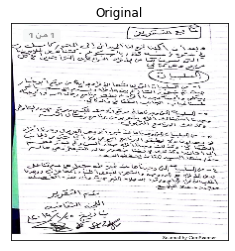

In [ ]:
res_img = processing(data)

In [ ]:
# A. IMAGE MANIPULATION with PIL - Python Image Library
# First of all, VIEWing an IMAGE
# - first import necessary libraries
import numpy as np
from PIL import Image
# - set a few generic variables
FilePath = '/content/'
FileName = 'test'
FileExt = '.png'
ImageFile = FilePath + FileName + FileExt
# - open the imagefile
img = Image.open(ImageFile)
# - inspect necessary information
print('Image format: ', img.format)
print('Image mode: ', img.mode)
# - display
img.show()

Image format:  JPEG
Image mode:  RGB


In [ ]:
# A.1. CONVERT an IMAGE to NP ARRAY
# - first import necessary libraries
from numpy import asarray
# - convert image format to numpy array
data = asarray(img)
# - inspect necessary information
print('data type: ', type(data))
print('data shape: ', data.shape)

data type:  <class 'numpy.ndarray'>
data shape:  (690, 483, 3)


In [ ]:
print(data)


[[[133 132 137]
  [116 115 120]
  [ 97  96 101]
  ...
  [ 32  26  26]
  [ 32  26  26]
  [ 32  26  26]]

 [[140 139 144]
  [126 125 130]
  [105 104 109]
  ...
  [ 32  26  26]
  [ 32  26  26]
  [ 32  26  26]]

 [[131 130 135]
  [125 124 129]
  [109 108 113]
  ...
  [ 32  26  26]
  [ 32  26  26]
  [ 32  26  26]]

 ...

 [[175 174 179]
  [175 174 179]
  [175 174 179]
  ...
  [169 168 173]
  [169 168 173]
  [168 167 172]]

 [[174 174 174]
  [174 174 174]
  [174 174 174]
  ...
  [171 166 172]
  [171 166 172]
  [171 166 172]]

 [[175 175 175]
  [175 175 175]
  [175 175 175]
  ...
  [171 166 172]
  [171 166 172]
  [171 166 172]]]


In [ ]:
# A.2. CONVERT NP ARRAY back to IMAGE format
# - convert numpy array to image format
img_fromnparray = Image.fromarray(data)
img_fromnparray.show()
# - inspect necessary information
print('Image size: ', img_fromnparray.size)
print('Image format: ', img_fromnparray.format)
print('Image mode: ', img_fromnparray.mode)

Image size:  (483, 690)
Image format:  None
Image mode:  RGB


In [ ]:
# A.3. SAVE the IMAGE to ANOTHER FORMAT, e.g. PNG (source was JPG before)
#  - 1st reopen image, and save is as PNG
data = asarray(Image.open(ImageFile))
print("Saving as PNG (RGB)...", FilePath + FileName)
print(type(data), data.shape)
img_png = Image.fromarray(data).save(FilePath + FileName + '_pil-rgb' + '.png')
#  - 2nd reopen image and convert it to grey, and save is as PNG
data = asarray(Image.open(ImageFile).convert('L'))
print("Saving as PNG (Grey)...", FilePath + FileName)
print(type(data), data.shape)
img_png = Image.fromarray(data).save(FilePath + FileName + '_pil-grey' + '.png')

Saving as PNG (RGB)... /content/test
<class 'numpy.ndarray'> (690, 483, 3)
Saving as PNG (Grey)... /content/test
<class 'numpy.ndarray'> (690, 483)


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt #importing matplotlib


gray_img = cv2.imread('/content/87d7e96364.png', cv2.IMREAD_GRAYSCALE)

img = cv2.imread('/content/87d7e96364.png',0)
equ = cv2.equalizeHist(gray_img)
res = np.hstack((gray_img,equ)) #stacking images side-by-side
cv2.imwrite('res1.png',res)

True

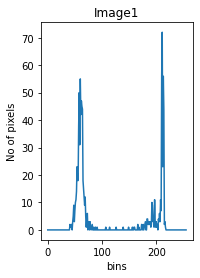

In [ ]:
img=cv2.imread('/content/87d7e96364.png')
gray_img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
hist=cv2.calcHist(gray_img,[0],None,[256],[0,256])
plt.subplot(121)
plt.title("Image1")
plt.xlabel('bins')
plt.ylabel("No of pixels")
plt.plot(hist)
plt.show()


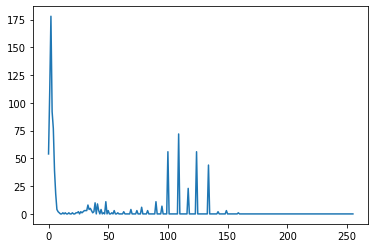

In [ ]:
gray_img_eqhist=cv2.equalizeHist(gray_img)
hist=cv2.calcHist(gray_img_eqhist,[0],None,[256],[0,256])
plt.plot(hist)
plt.show()


In [ ]:
!curl -o logo.png https://colab.research.google.com/img/colab_favicon_256px.png
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('logo.png', cv2.IMREAD_UNCHANGED)
cv2_imshow(img)

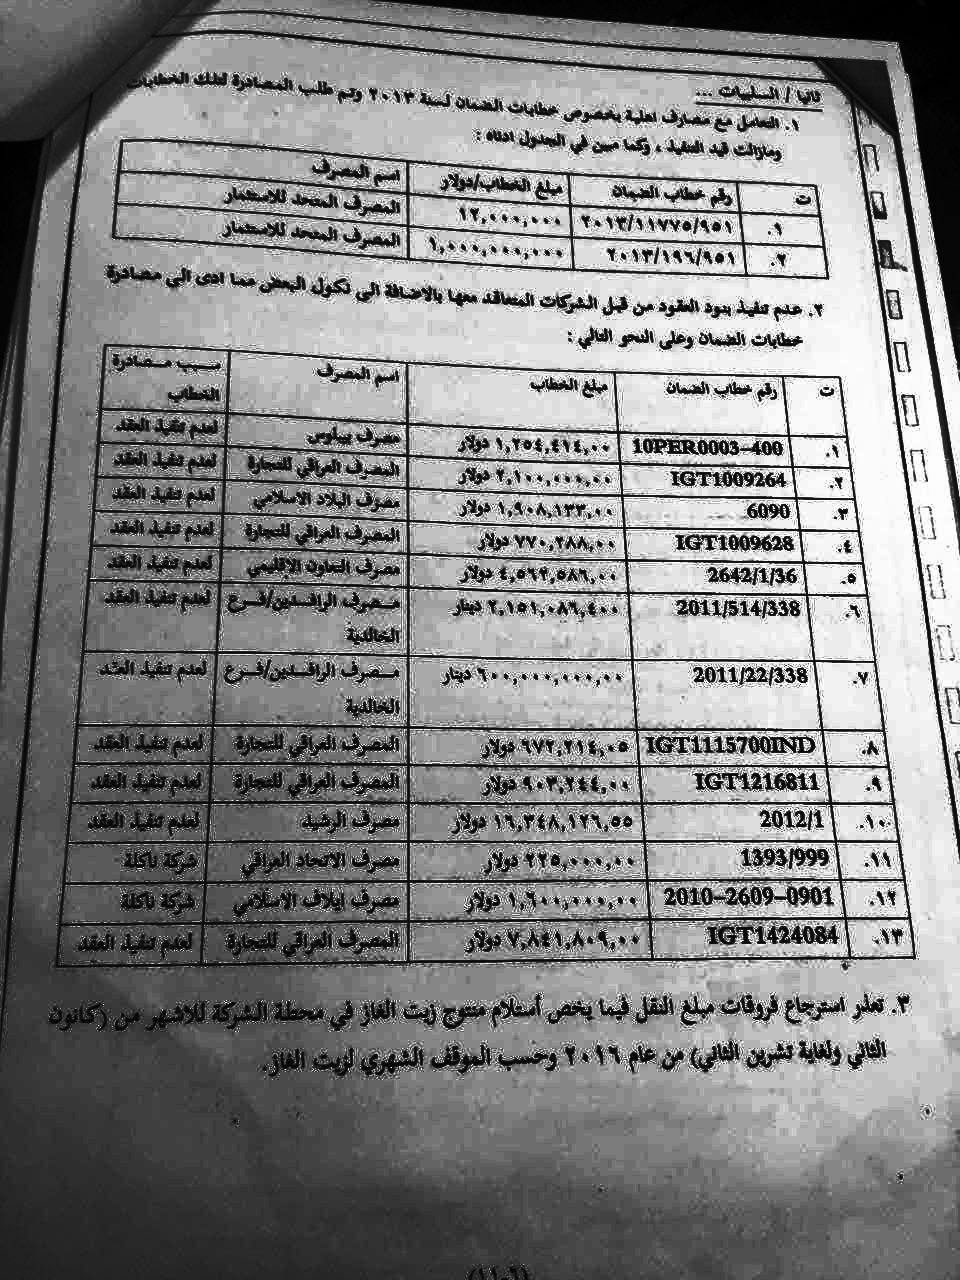

In [ ]:
cv2_imshow(gray_img_eqhist)

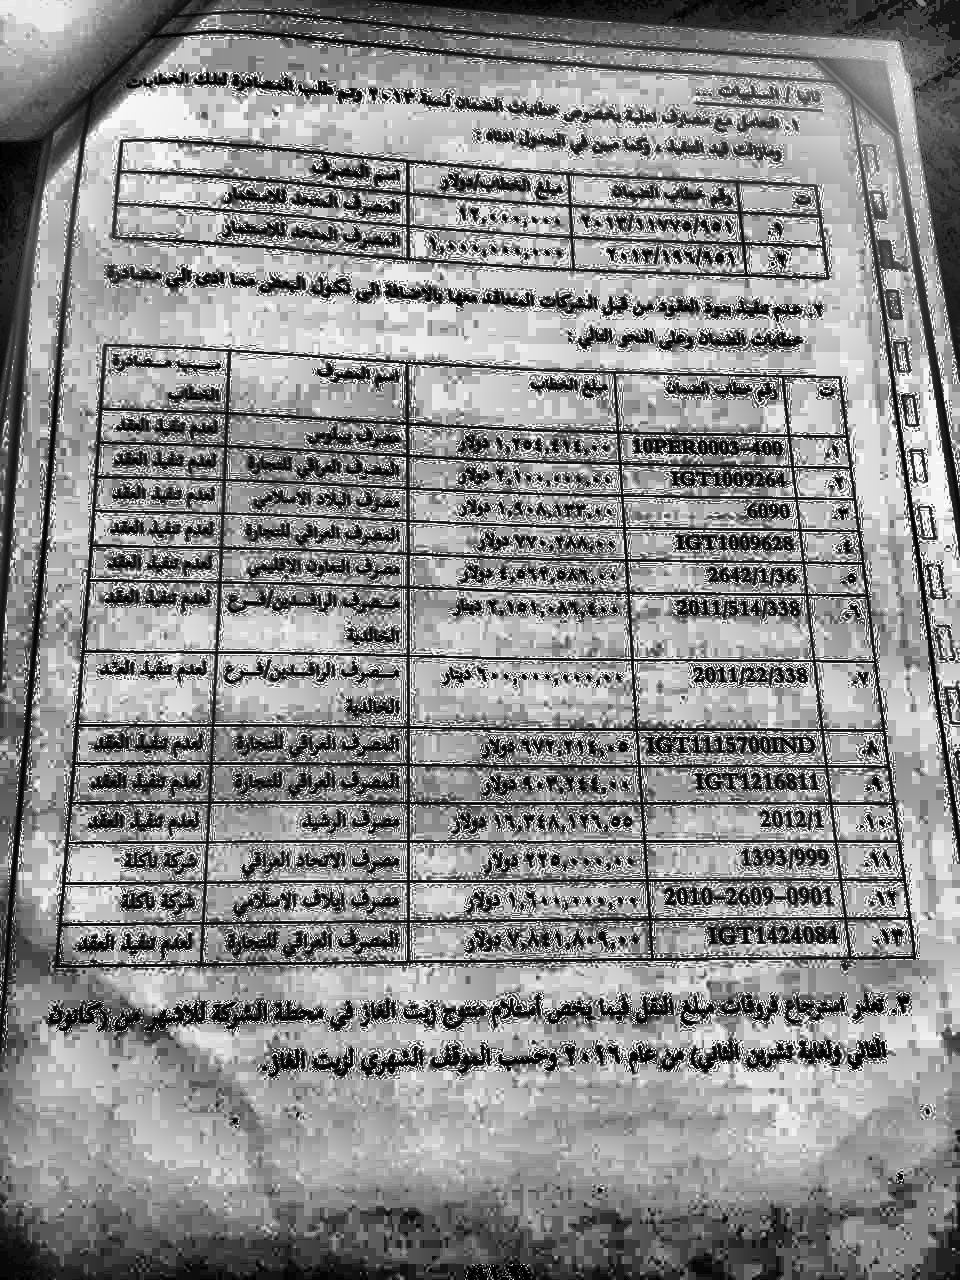

In [ ]:
clahe=cv2.createCLAHE(clipLimit=40)
gray_img_clahe=clahe.apply(gray_img_eqhist)
cv2_imshow(gray_img_clahe)

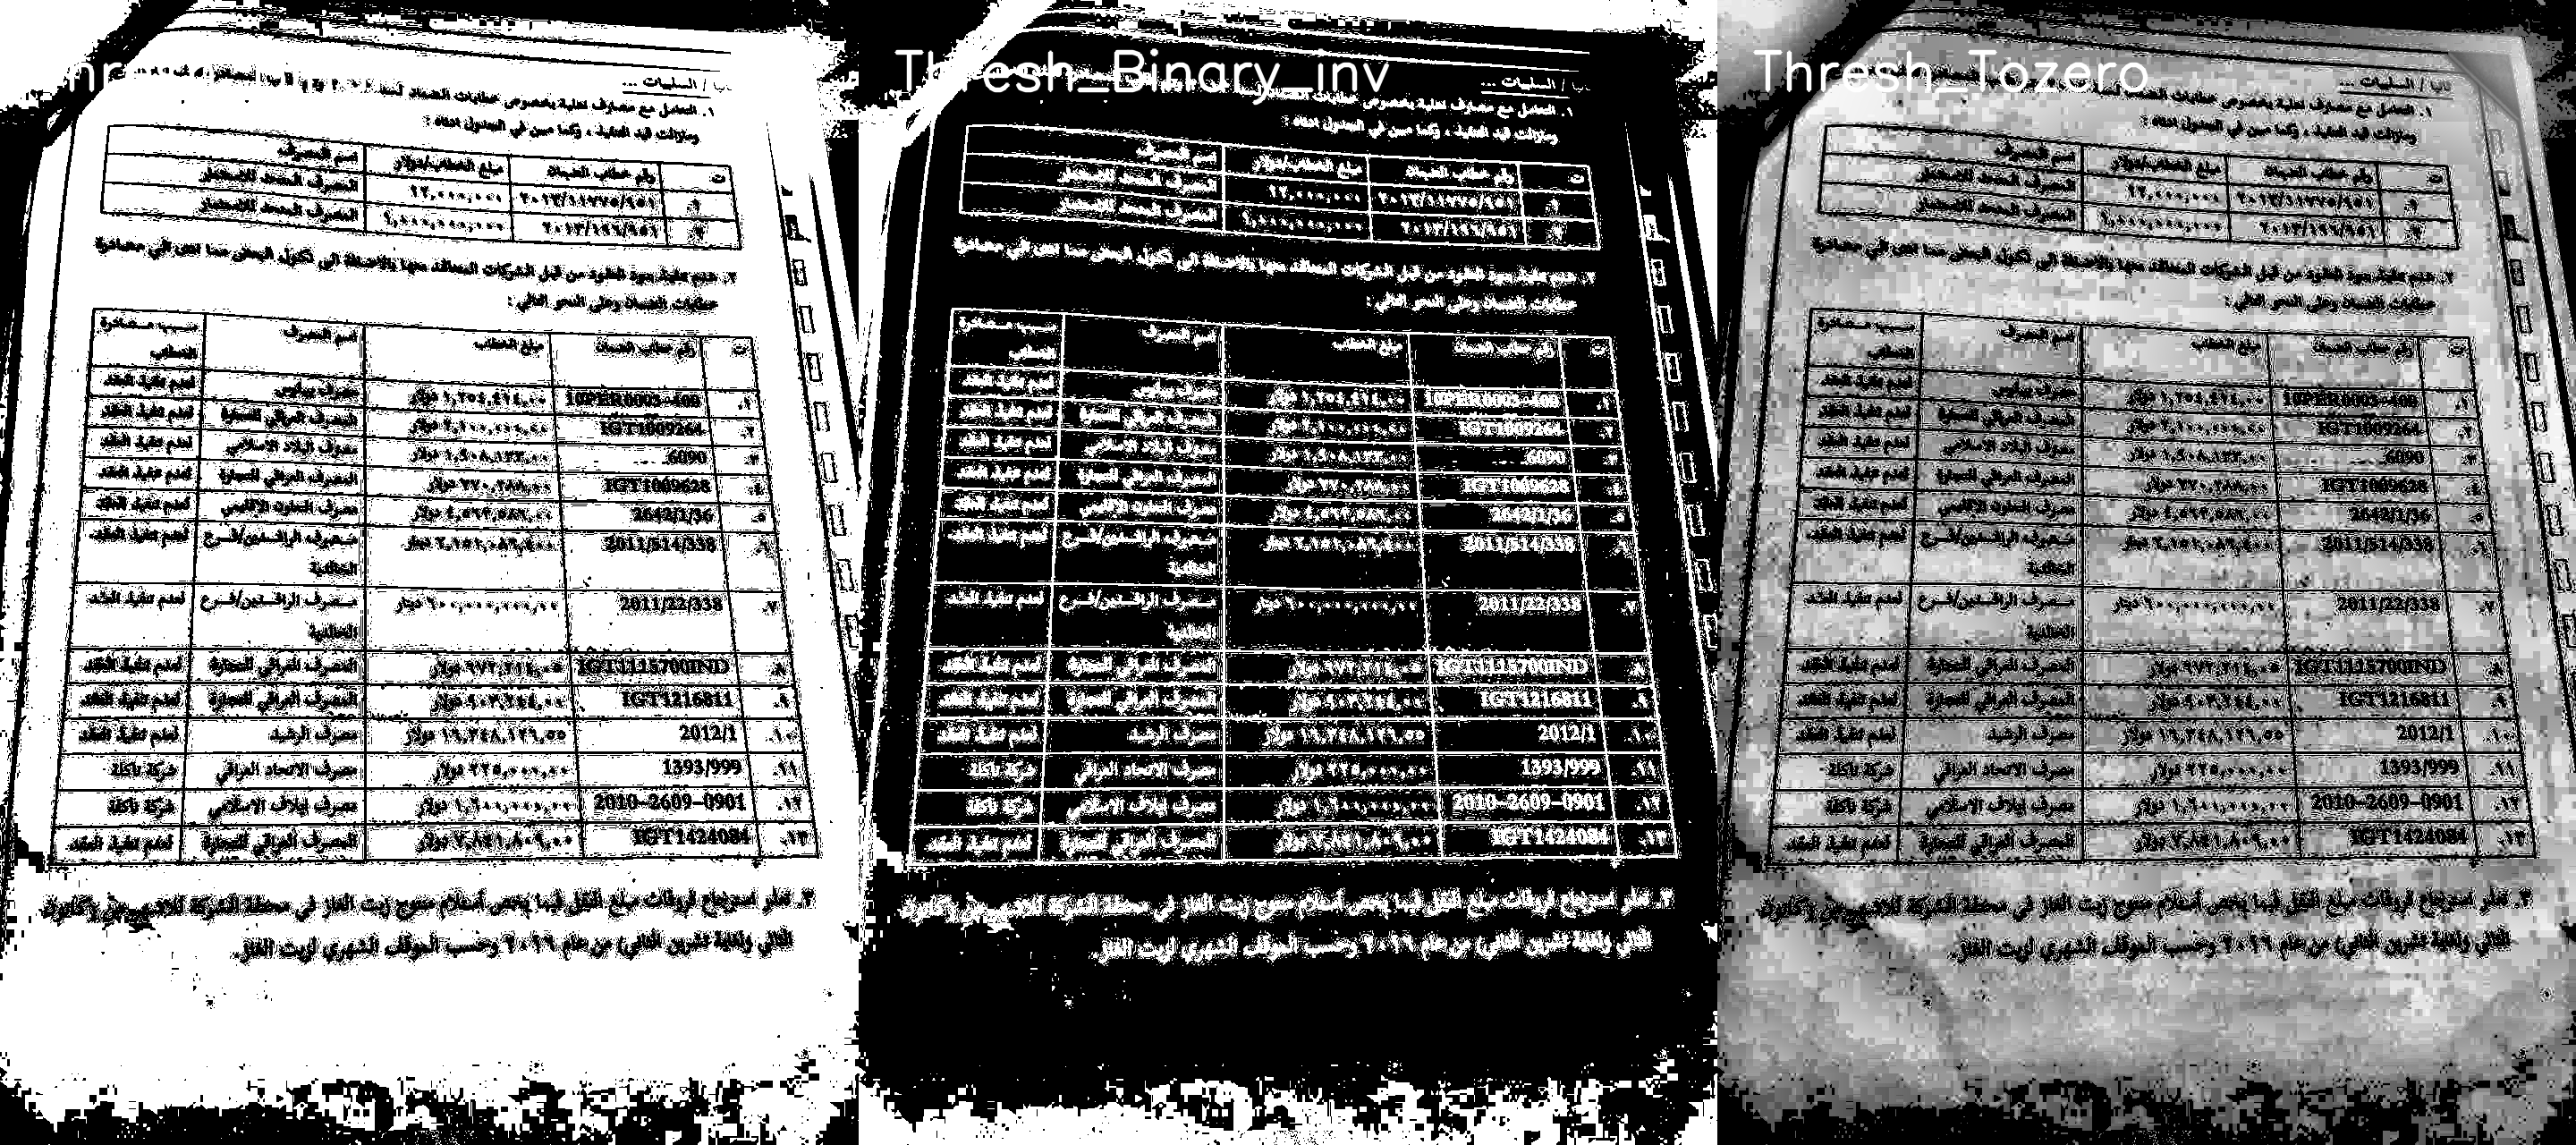

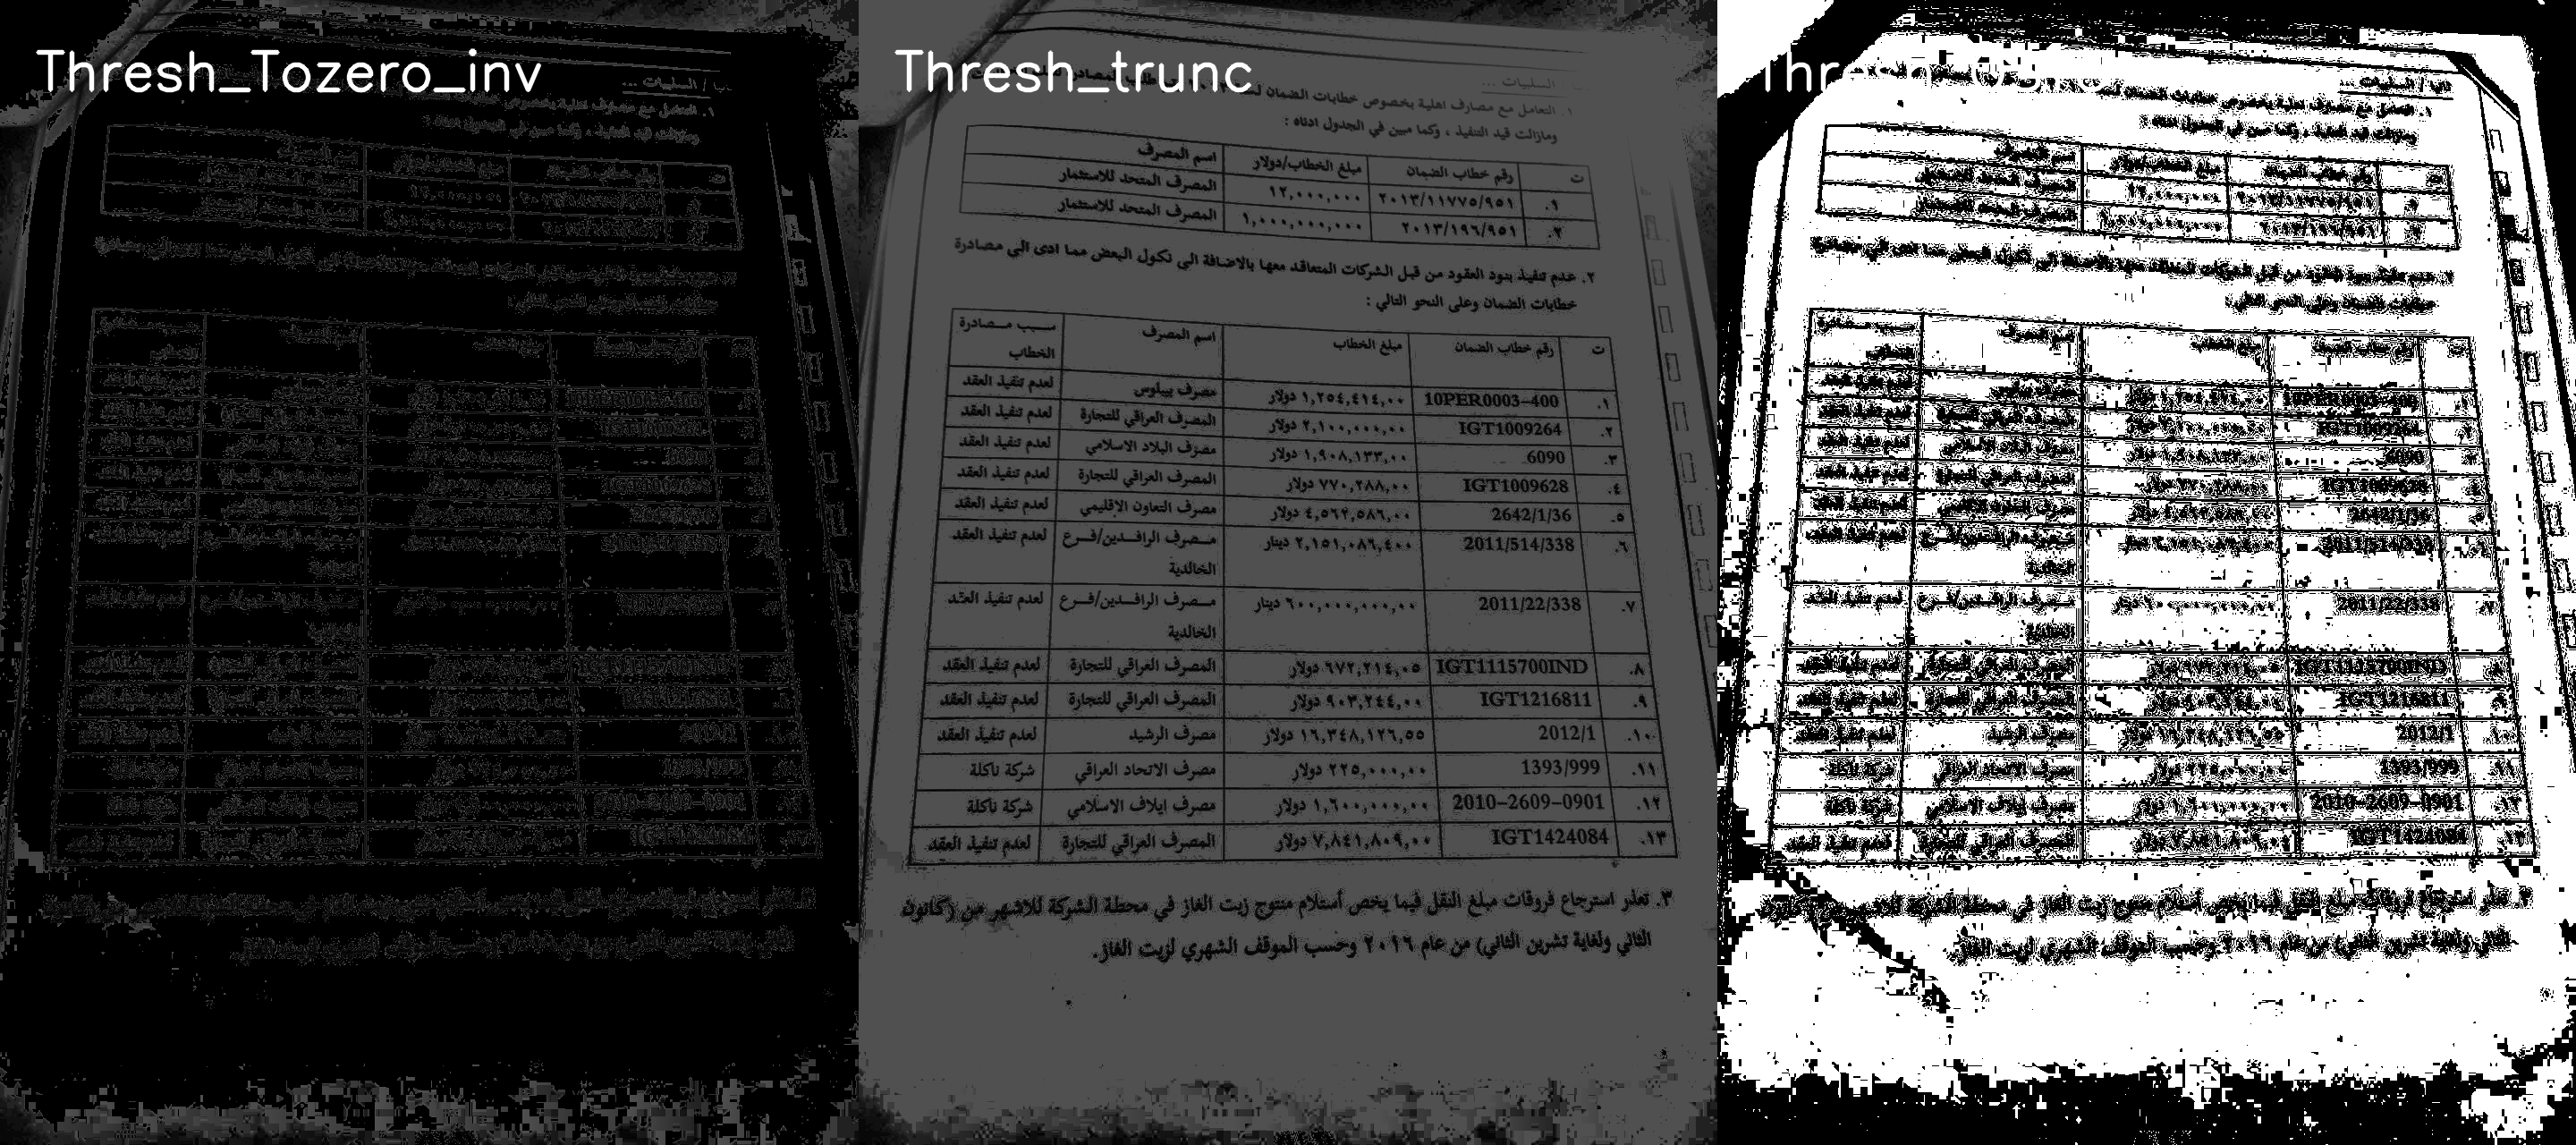

In [ ]:
th=80
max_val=255
ret, o1 = cv2.threshold(gray_img_clahe, th, max_val, cv2.THRESH_BINARY)
cv2.putText(o1,"Thresh_Binary",(40,100),cv2.FONT_HERSHEY_SIMPLEX,2,(255,255,255),3,cv2.LINE_AA)
ret, o2 = cv2.threshold(gray_img_clahe, th, max_val, cv2.THRESH_BINARY_INV)
cv2.putText(o2,"Thresh_Binary_inv",(40,100),cv2.FONT_HERSHEY_SIMPLEX,2,(255,255,255),3,cv2.LINE_AA)
ret, o3 = cv2.threshold(gray_img_clahe, th, max_val, cv2.THRESH_TOZERO)
cv2.putText(o3,"Thresh_Tozero",(40,100),cv2.FONT_HERSHEY_SIMPLEX,2,(255,255,255),3,cv2.LINE_AA)
ret, o4 = cv2.threshold(gray_img_clahe, th, max_val, cv2.THRESH_TOZERO_INV)
cv2.putText(o4,"Thresh_Tozero_inv",(40,100),cv2.FONT_HERSHEY_SIMPLEX,2,(255,255,255),3,cv2.LINE_AA)
ret, o5 = cv2.threshold(gray_img_clahe, th, max_val, cv2.THRESH_TRUNC)
cv2.putText(o5,"Thresh_trunc",(40,100),cv2.FONT_HERSHEY_SIMPLEX,2,(255,255,255),3,cv2.LINE_AA)
ret ,o6=  cv2.threshold(gray_img_clahe, th, max_val,  cv2.THRESH_OTSU)
cv2.putText(o6,"Thresh_OSTU",(40,100),cv2.FONT_HERSHEY_SIMPLEX,2,(255,255,255),3,cv2.LINE_AA)

final=np.concatenate((o1,o2,o3),axis=1)
final1=np.concatenate((o4,o5,o6),axis=1)

cv2.imwrite("Image1.jpg",final)
cv2.imwrite("Image2.jpg",final1)
cv2_imshow(final)
cv2_imshow(final1)

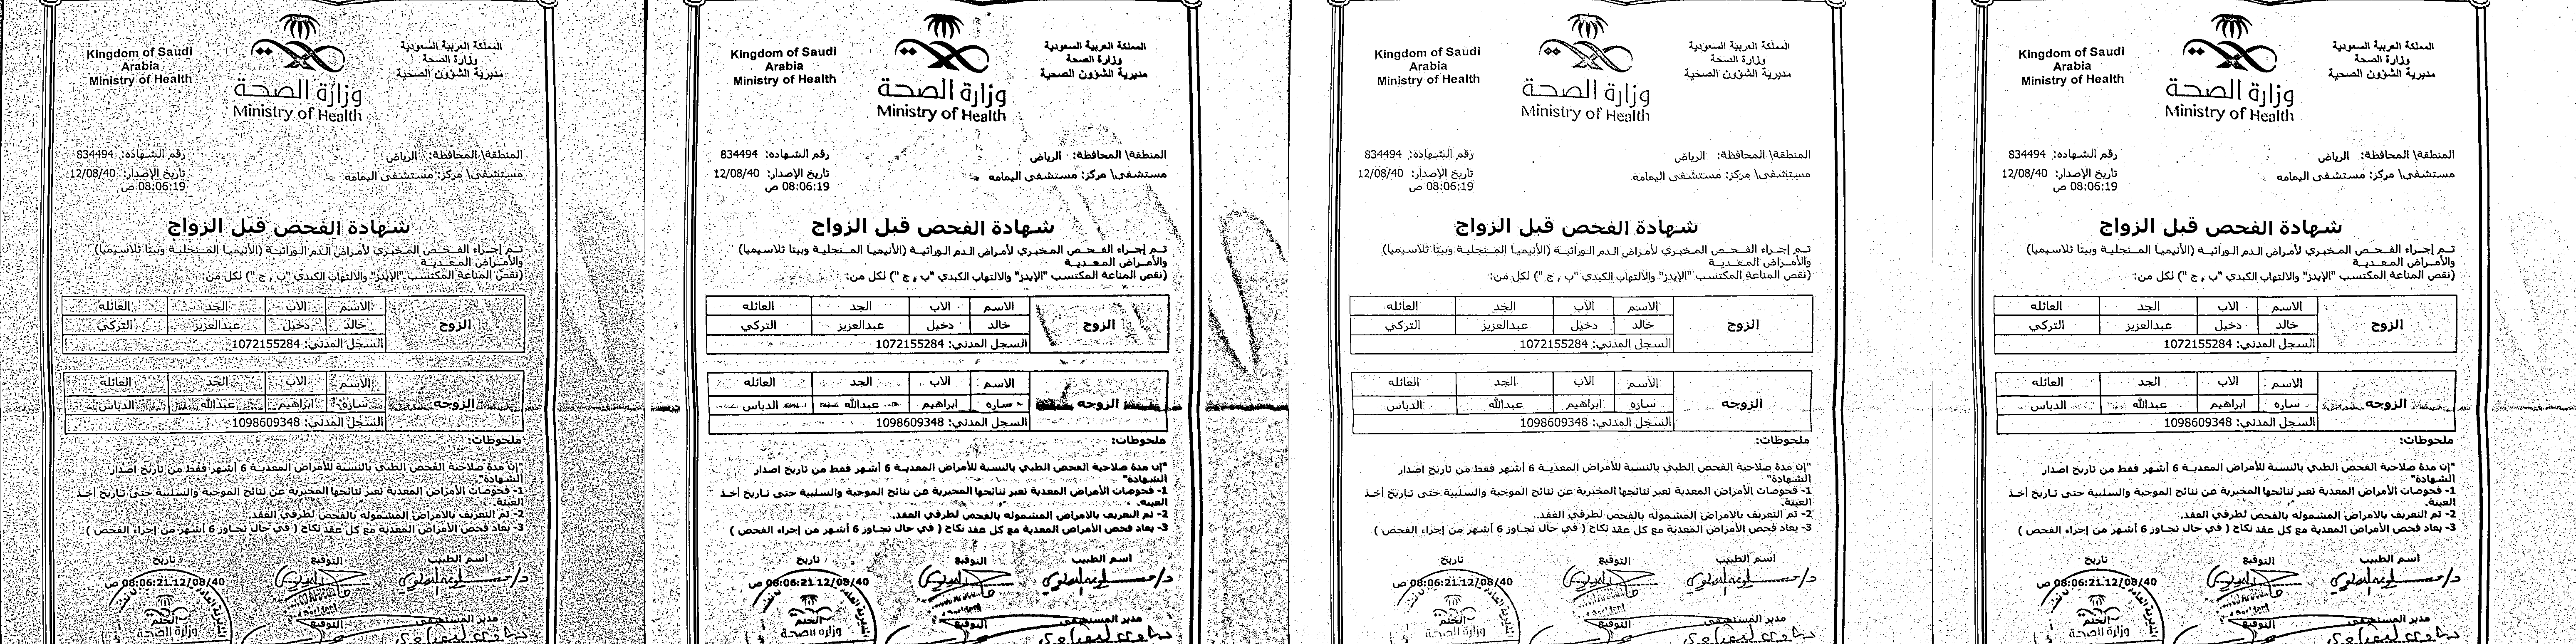

In [ ]:
gray_image = cv2.imread('/content/40.png',0)

thresh1 = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
thresh2 = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 31, 3)
thresh3 = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 13, 5)
thresh4 = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 31, 4)
thresh1 = cv2.cvtColor(thresh1,cv2.COLOR_GRAY2RGB)
thresh2 = cv2.cvtColor(thresh2,cv2.COLOR_GRAY2RGB)
thresh3 = cv2.cvtColor(thresh3,cv2.COLOR_GRAY2RGB)
thresh4 = cv2.cvtColor(thresh4,cv2.COLOR_GRAY2RGB)

final=np.concatenate((thresh1,thresh2,thresh3,thresh4),axis=1)
cv2.imwrite('rect.jpg',final)
cv2_imshow(final)

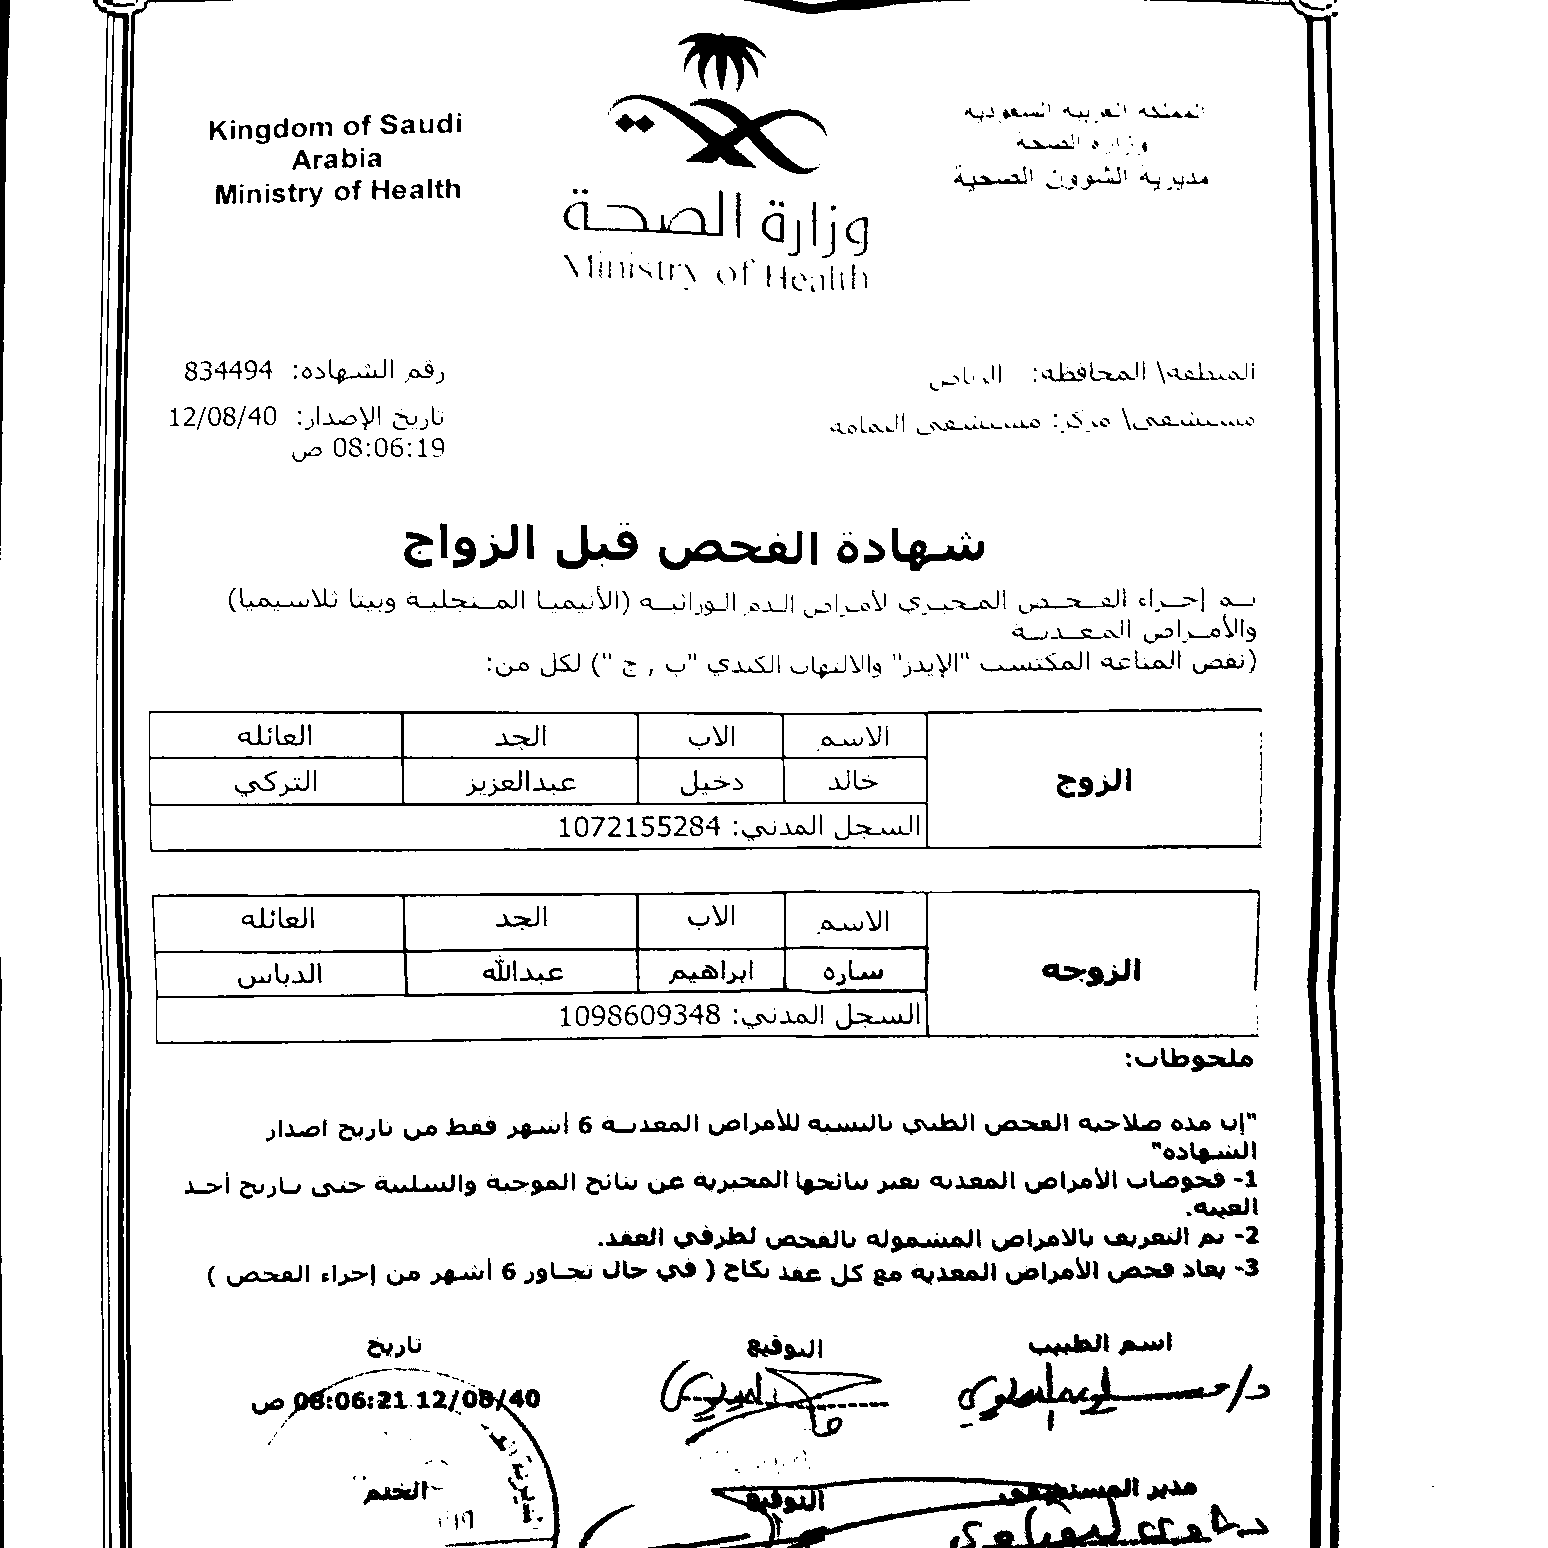

In [ ]:
ret,thresh1 = cv2.threshold(gray_image,0, 255,  cv2.THRESH_BINARY+cv2.THRESH_OTSU)
thresh1 = cv2.cvtColor(thresh1,cv2.COLOR_GRAY2RGB)

cv2.imwrite('rect.jpeg',thresh1)
cv2_imshow(thresh1)

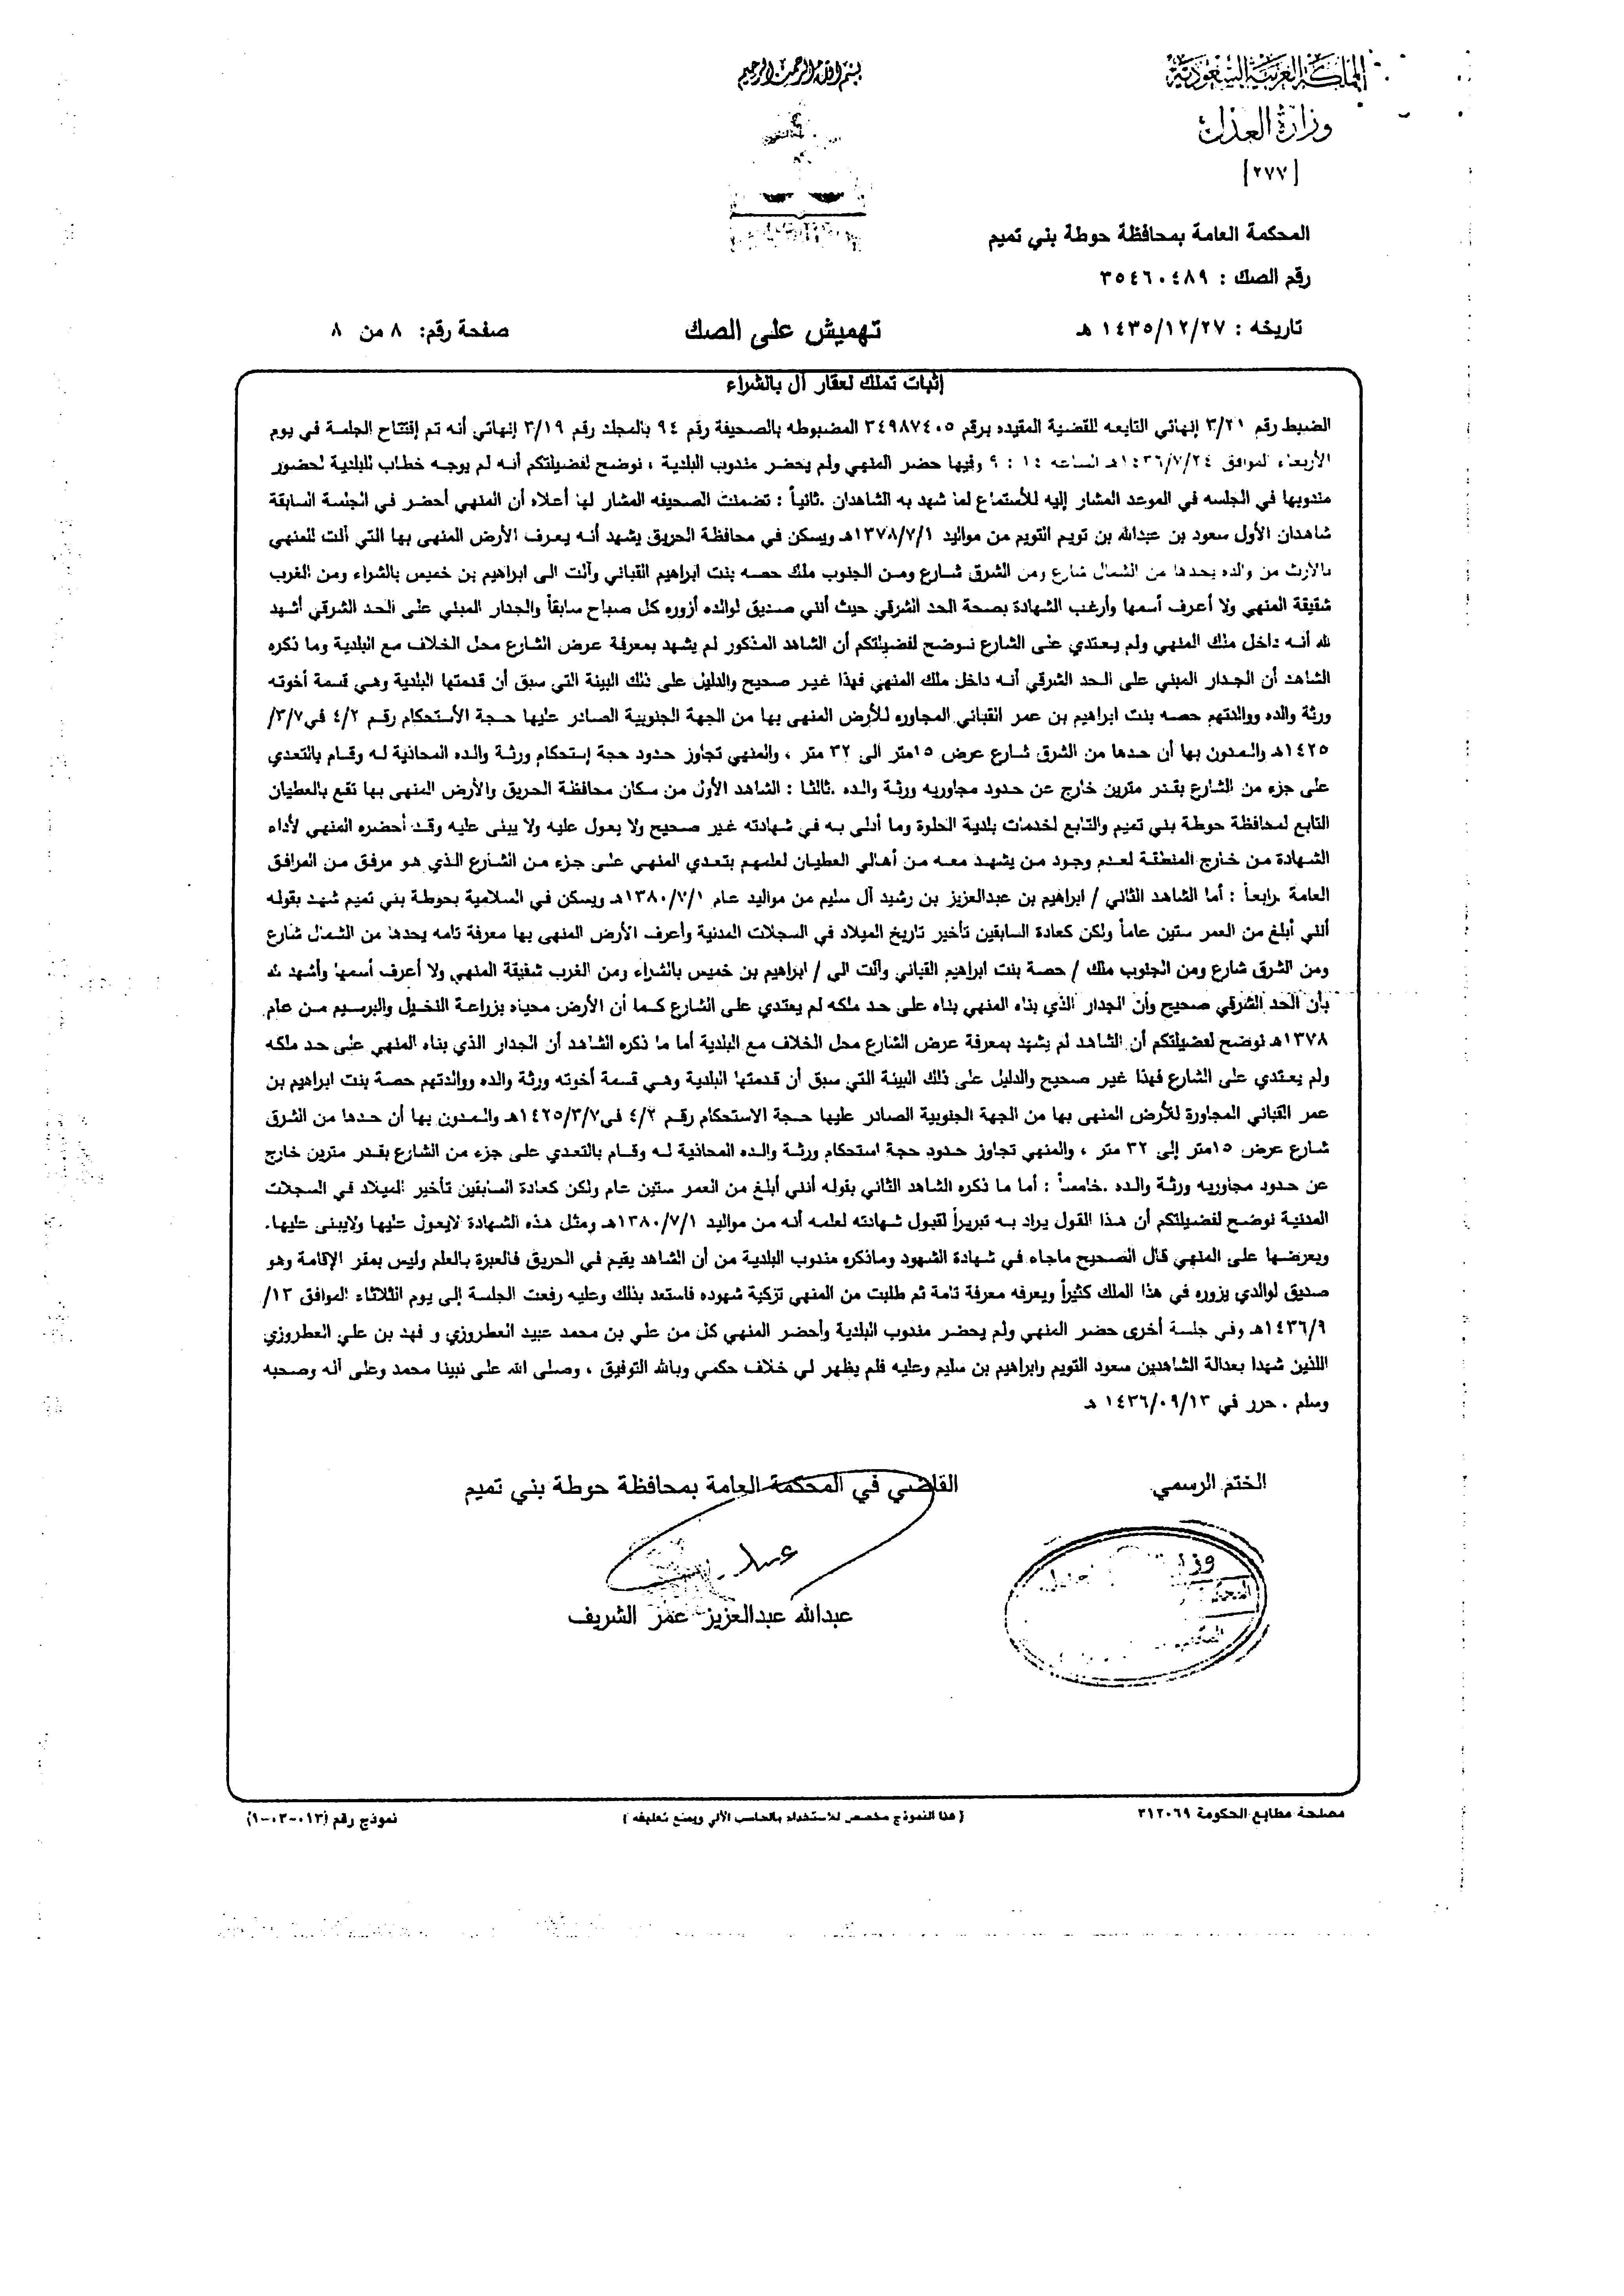

In [ ]:
gray_image = cv2.imread('/content/OUT_3edDoc7.png',0)

ret,thresh1 = cv2.threshold(gray_image,0, 255,  cv2.THRESH_BINARY+cv2.THRESH_OTSU)

cv2.imwrite('rect.jpeg',thresh1)
cv2_imshow(thresh1)

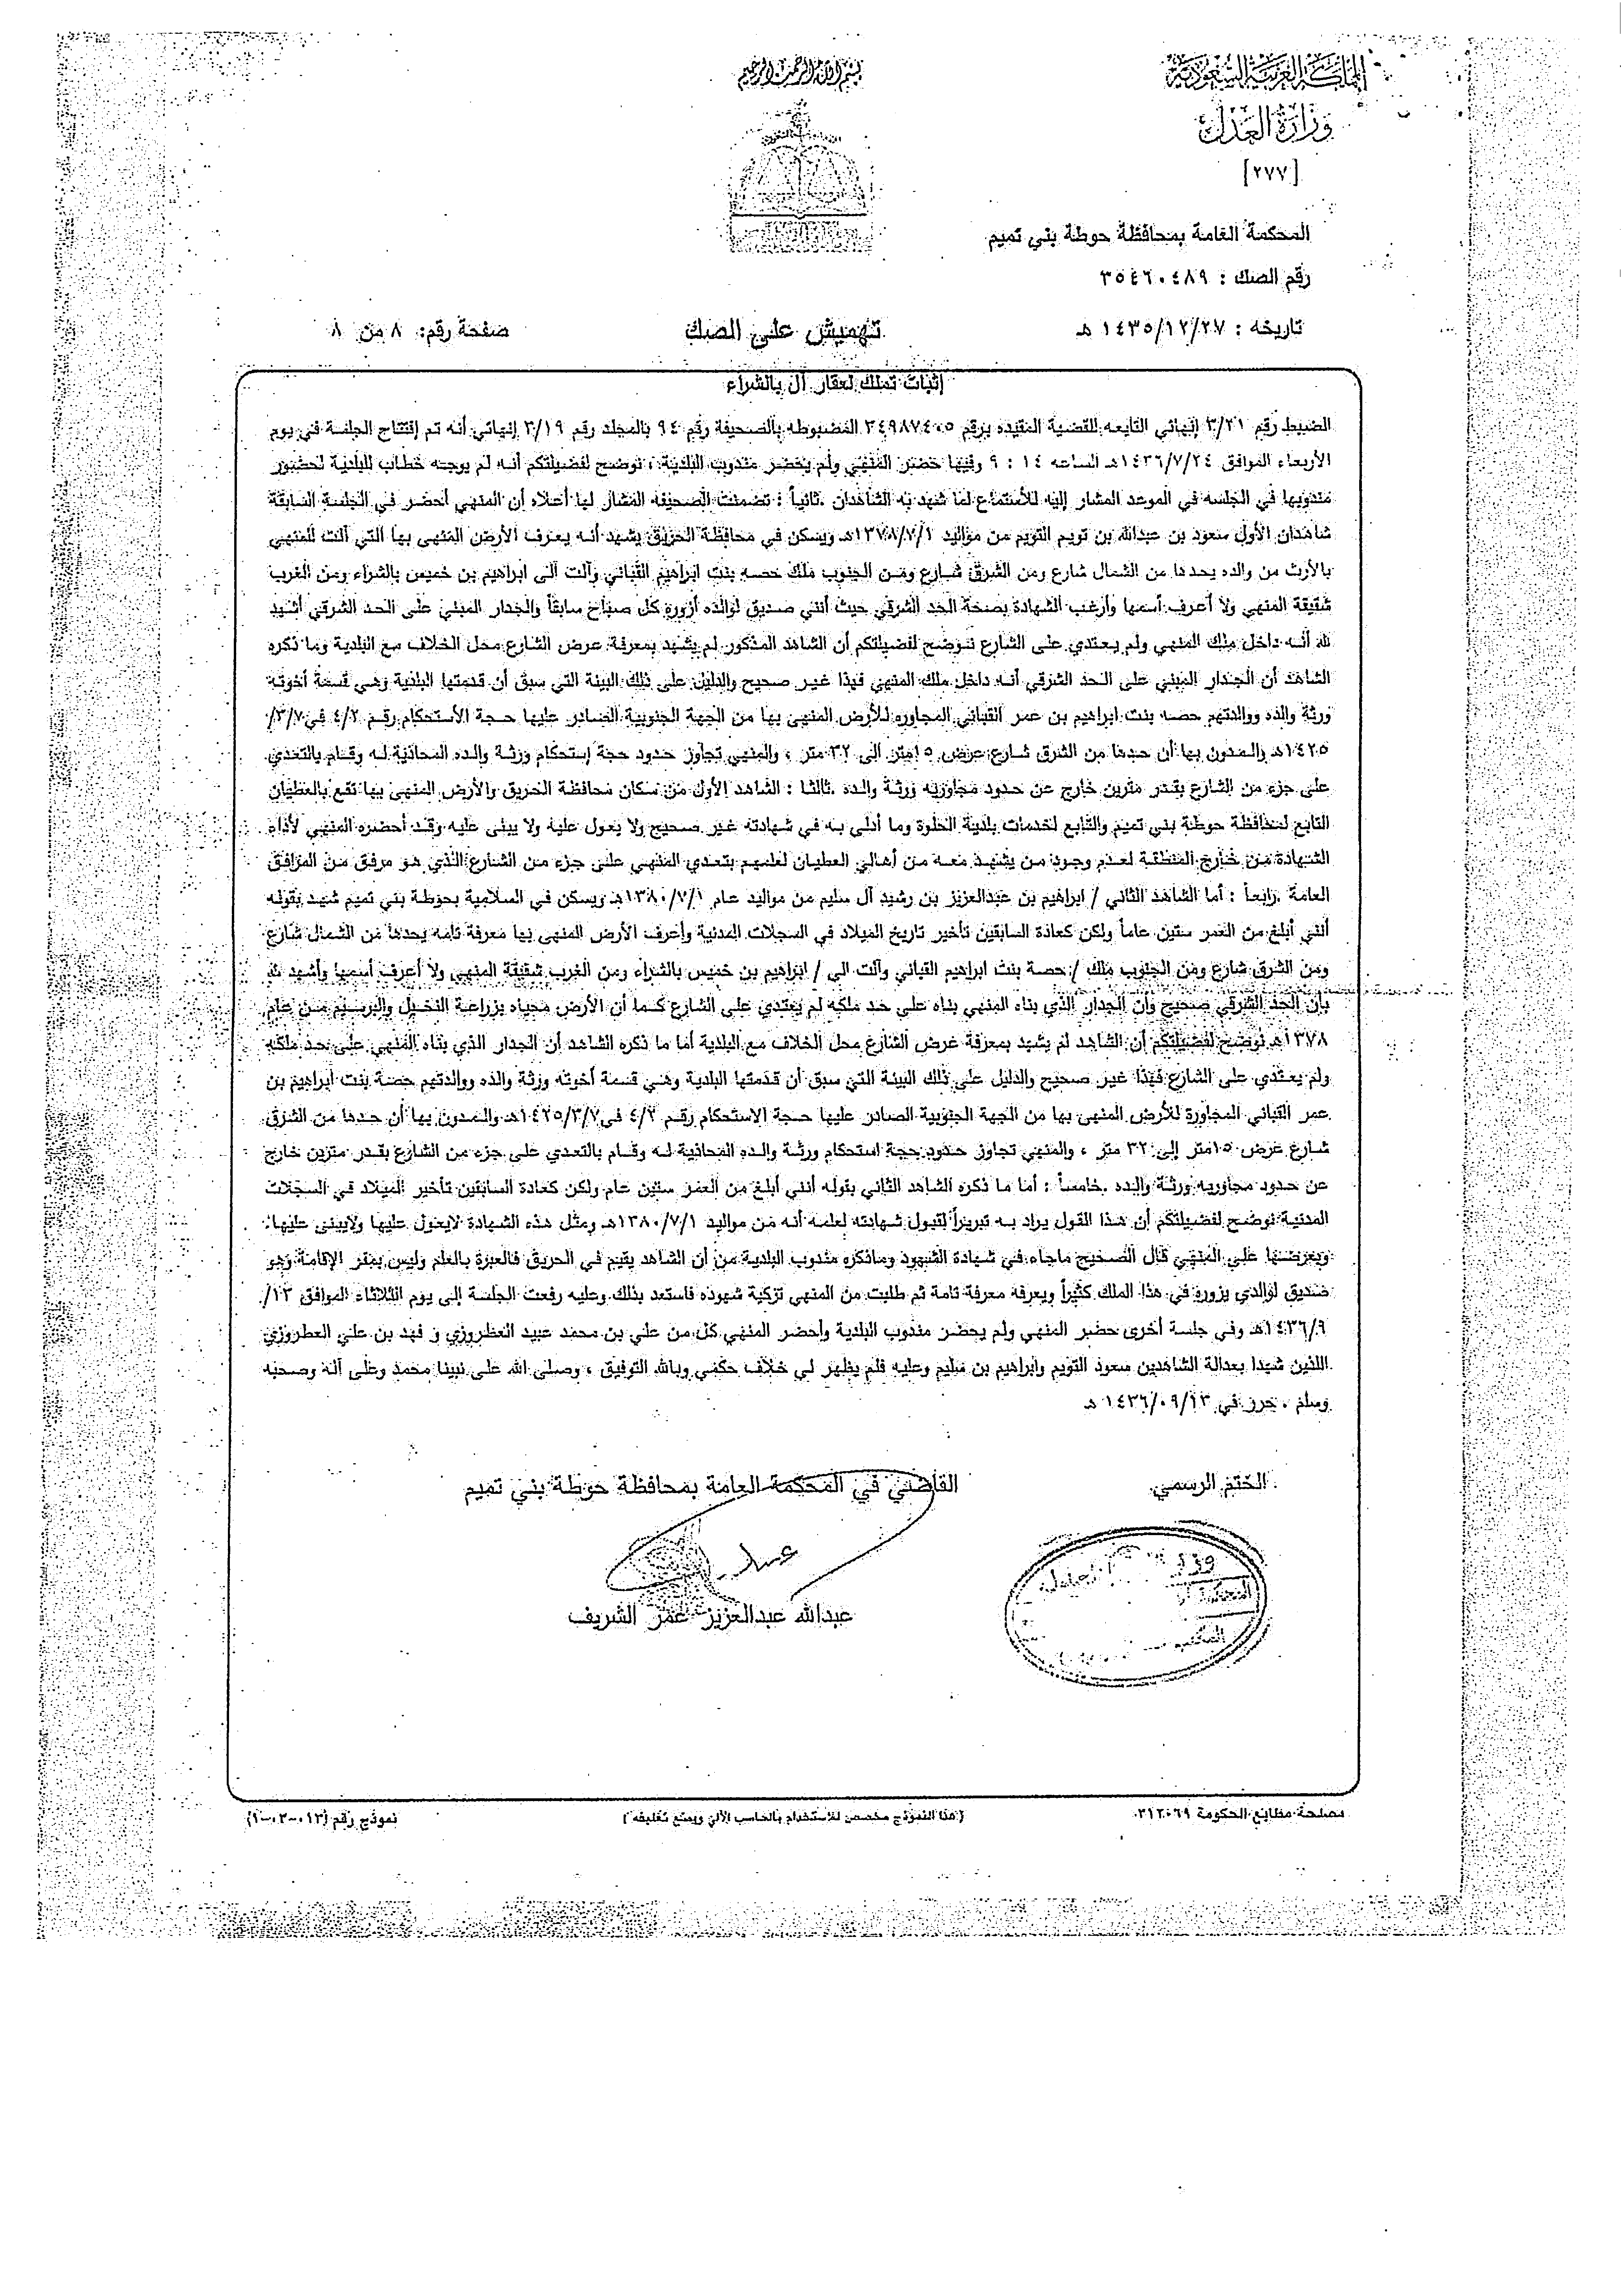

In [ ]:
gray_image = cv2.imread('/content/OUT_3edDoc7.png',0)

thresh3 = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 13, 5)
# ret,thresh3 = cv2.threshold(gray_image,0, 255,  cv2.THRESH_BINARY+cv2.THRESH_OTSU)

cv2.imwrite('rect.jpeg',thresh3)
cv2_imshow(thresh3)

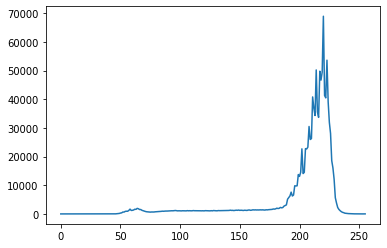

In [ ]:
import matplotlib.pyplot as plt #importing matplotlib
import cv2

img = cv2.imread('/content/87d7e96364.png',0) 

# find frequency of pixels in range 0-255 
histr = cv2.calcHist([img],[0],None,[256],[0,256]) 
  
# show the plotting graph of an image 
plt.plot(histr) 
plt.show() 

# Classification 
- [ ] Size of the imagees
- [ ] Image Preprocessing
- [ ] Collect larger data
- [ ] test the model 

## Libraries


In [ ]:
!pip install opencv-python

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from imutils import paths
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import pickle
import matplotlib.pyplot as plt
import numpy as np
import argparse
import cv2
import os
from tqdm import tqdm
from PIL import Image 
from keras import optimizers


## Creat the Dataset

In [ ]:
DATADIR = "dataset"

CATEGORIES = ["auth", "notAuth"]

auth OUT_12thDoc0.png 

OUT_12thDoc0.png


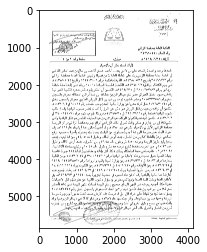

notAuth 74.pdf 

74.pdf


TypeError: ignored

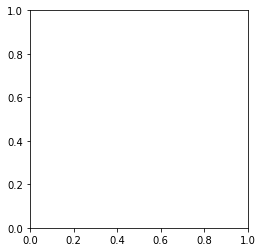

In [ ]:
# Just for test
for category in CATEGORIES:  
    path = os.path.join(DATADIR,category)
    for img in os.listdir(path):  
        print(category,img, "\n") 
        img_array = cv2.imread(os.path.join(path,img))
        print(img)
        plt.imshow(img_array)  # graph it
        plt.show()  # display!
        break

In [ ]:
dataSet = []
IMG_SIZE = 224

def create_training_data():
    for category in CATEGORIES:  

        path = os.path.join(DATADIR,category) 
        print(path)
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 
        print(class_num)
        for img in tqdm(os.listdir(path)):  
            try:
                img_array = cv2.imread(os.path.join(path,img),0)  # convert to array
                ret,img_array = cv2.threshold(img_array,0, 255,  cv2.THRESH_BINARY+cv2.THRESH_OTSU)
                img_array = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                dataSet.append([new_array, class_num])  # add this to our dataset
            except Exception as e:  # in the interest in keeping the output clean...
            #except OSError as e:
                print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
                print("general exception", e, os.path.join(path,img))

create_training_data()

print(len(dataSet))

  0%|          | 0/27 [00:00<?, ?it/s]

dataset/auth
0


 12%|█▎        | 8/64 [00:00<00:01, 43.92it/s]

dataset/notAuth
1
OSErrroBad img most likely OpenCV(4.1.2) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'
 dataset/notAuth/74.pdf
general exception OpenCV(4.1.2) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'
 dataset/notAuth/74.pdf


 31%|███▏      | 20/64 [00:00<00:00, 50.38it/s]

OSErrroBad img most likely OpenCV(4.1.2) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'
 dataset/notAuth/78.pdf
general exception OpenCV(4.1.2) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'
 dataset/notAuth/78.pdf
OSErrroBad img most likely OpenCV(4.1.2) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'
 dataset/notAuth/103.pdf
general exception OpenCV(4.1.2) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'
 dataset/notAuth/103.pdf


 45%|████▌     | 29/64 [00:00<00:00, 57.70it/s]

OSErrroBad img most likely OpenCV(4.1.2) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'
 dataset/notAuth/95.pdf
general exception OpenCV(4.1.2) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'
 dataset/notAuth/95.pdf
OSErrroBad img most likely OpenCV(4.1.2) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'
 dataset/notAuth/169.pdf
general exception OpenCV(4.1.2) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'
 dataset/notAuth/169.pdf
OSErrroBad img most likely OpenCV(4.1.2) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'
 dataset/notAuth/99.pdf
general exception OpenCV(4.1.2) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty(

 86%|████████▌ | 55/64 [00:00<00:00, 63.12it/s]

OSErrroBad img most likely OpenCV(4.1.2) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'
 dataset/notAuth/65.pdf
general exception OpenCV(4.1.2) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'
 dataset/notAuth/65.pdf
OSErrroBad img most likely OpenCV(4.1.2) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'
 dataset/notAuth/36.pdf
general exception OpenCV(4.1.2) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'
 dataset/notAuth/36.pdf
OSErrroBad img most likely OpenCV(4.1.2) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'
 dataset/notAuth/70.pdf
general exception OpenCV(4.1.2) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() 

100%|██████████| 64/64 [00:01<00:00, 59.94it/s]

82


In [ ]:
import random

random.shuffle(dataSet)

In [ ]:
for sample in dataSet[:10]:
    print(sample[1])

0
0
0
0
1
1
1
1
1
1


In [ ]:

# grab the list of images in our dataset directory, then initialize
# the list of data (i.e., images) and class images

X = []
y = []

for features,label in dataSet:
  features = cv2.resize(features, (224, 224))
  X.append(features)
  y.append(label)
  # y = np.array(label)





# X = np.array(X).reshape(IMG_SIZE, IMG_SIZE)  / 255.0
# # X = np.array(X) / 255.0
# y = np.array(y)
# # X = X/255.0

In [ ]:
X = np.array(X) / 255.0
y = np.array(y)
# X = X/255.0

## Create the Training and Validation datasets


In [ ]:

from sklearn.model_selection import train_test_split

# (trainX, testX, trainY, testY) = train_test_split(X, y,
# 	test_size=0.20, stratify=y, random_state=42)


train_ratio = 0.75
validation_ratio = 0.15
test_ratio = 0.10

# train is now 75% of the entire data set
# the _junk suffix means that we drop that variable completely
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=1 - train_ratio)

# test is now 10% of the initial data set
# validation is now 15% of the initial data set
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio)) 

print(x_train, x_val, x_test)

[[[[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]]

  [[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]]

  [[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]]

  ...

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]]

  [[0.         0.         0.        ]
   [0. 

In [ ]:
y_train

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1])

In [ ]:
y

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0])

In [ ]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

## Model settings


In [ ]:
# initialize the training data augmentation object
trainAug = ImageDataGenerator(
	rotation_range=15,
	fill_mode="nearest")

INIT_LR = 1e-3
EPOCHS = 15
BS = 8

## 1st model

In [ ]:

nClasses = 2
model = Sequential()


model.add(Conv2D(256, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))



opt = Adam(lr=INIT_LR, decay=INIT_LR / 20)
model.compile(loss="binary_crossentropy", optimizer=opt,
	metrics=["accuracy"])


history1 = model.fit_generator(
	trainAug.flow(x_train, y_train, batch_size=BS),
	steps_per_epoch=len(x_train) // BS,
	validation_data=(x_val, y_val),
	validation_steps=len(x_test),
	epochs=20)

Epoch 1/20
7/7 [==============================] - 1s 147ms/step - loss: 110.3390 - accuracy: 0.6226 - val_loss: 13.0350 - val_accuracy: 0.2500
Epoch 2/20
7/7 [==============================] - 1s 94ms/step - loss: 5.1707 - accuracy: 0.6038
Epoch 3/20
7/7 [==============================] - 1s 94ms/step - loss: 0.4406 - accuracy: 0.7547
Epoch 4/20
7/7 [==============================] - 1s 93ms/step - loss: 0.5956 - accuracy: 0.8113
Epoch 5/20
7/7 [==============================] - 1s 93ms/step - loss: 0.7664 - accuracy: 0.8302
Epoch 6/20
7/7 [==============================] - 1s 95ms/step - loss: 0.8486 - accuracy: 0.9245
Epoch 7/20
7/7 [==============================] - 1s 94ms/step - loss: 0.0766 - accuracy: 1.0000
Epoch 8/20
7/7 [==============================] - 1s 95ms/step - loss: 0.1070 - accuracy: 0.9811
Epoch 9/20
7/7 [==============================] - 1s 98ms/step - loss: 0.0957 - accuracy: 0.9821
Epoch 10/20
7/7 [==============================] - 1s 95ms/step - loss: 0.0445 - 

# Testing

In [ ]:
def test(model,x_test,y_test):
  predictions = model.predict(x_test,batch_size=BS)
  predictions
  y_pred = (predictions > 0.5)
  target_names= ['auth', 'notauth']
# testY, y_pred
  print(confusion_matrix (y_pred, y_test))
  print(classification_report(y_pred, y_test, target_names=target_names))


In [ ]:
test(model,x_test,y_test)

# 2n Model 

https://github.com/udacity/aind2-cnn/blob/master/cifar10-classification/cifar10_cnn.ipynb

In [ ]:
model = Sequential()


model.add(Conv2D(256, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(500))
model.add(Dense(1))
model.add(Activation('sigmoid'))



opt = Adam(lr=INIT_LR, decay=INIT_LR / 20)
model.compile(loss="binary_crossentropy", optimizer=opt,
	metrics=["accuracy"])



history1 = model.fit_generator(
	trainAug.flow(trainX, trainY, batch_size=BS),
	steps_per_epoch=len(trainX) // BS,
	validation_data=(testX, testY),
	validation_steps=len(testX),
	epochs=20)


Epoch 1/20
47/47 [==============================] - 114s 2s/step - loss: 2.0415 - accuracy: 0.7547 - val_loss: 1.0632 - val_accuracy: 0.8646
Epoch 2/20
47/47 [==============================] - 113s 2s/step - loss: 0.3468 - accuracy: 0.9013 - val_loss: 0.3697 - val_accuracy: 0.8125
Epoch 3/20
47/47 [==============================] - 112s 2s/step - loss: 0.2781 - accuracy: 0.8987 - val_loss: 0.3101 - val_accuracy: 0.8646
Epoch 4/20
47/47 [==============================] - 115s 2s/step - loss: 0.2106 - accuracy: 0.9200 - val_loss: 0.6724 - val_accuracy: 0.8854
Epoch 5/20
47/47 [==============================] - 114s 2s/step - loss: 0.1887 - accuracy: 0.9253 - val_loss: 0.3168 - val_accuracy: 0.8646
Epoch 6/20
47/47 [==============================] - 113s 2s/step - loss: 0.2177 - accuracy: 0.9253 - val_loss: 1.7906 - val_accuracy: 0.8438
Epoch 7/20
47/47 [==============================] - 114s 2s/step - loss: 0.2594 - accuracy: 0.9307 - val_loss: 0.5812 - val_accuracy: 0.8646
Epoch 8/20
47

### 2nd with different param

In [ ]:
model = Sequential()


model.add(Conv2D(256, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(500))
model.add(Dense(1))
model.add(Activation('sigmoid'))



opt = Adam(lr=INIT_LR, decay=INIT_LR / 20)
model.compile(loss="binary_crossentropy", optimizer=opt,
	metrics=["accuracy"])



history1 = model.fit_generator(
	trainAug.flow(trainX, trainY, batch_size=32),
	steps_per_epoch=len(trainX) // 32,
	validation_data=(testX, testY),
	validation_steps=len(testX),
	epochs=100)


Epoch 1/100
11/11 [==============================] - 95s 9s/step - loss: 8.8198 - accuracy: 0.5271 - val_loss: 1.5911 - val_accuracy: 0.4896
Epoch 2/100
11/11 [==============================] - 95s 9s/step - loss: 0.9481 - accuracy: 0.6364 - val_loss: 0.7984 - val_accuracy: 0.7083
Epoch 3/100
11/11 [==============================] - 94s 9s/step - loss: 0.4225 - accuracy: 0.8433 - val_loss: 1.3565 - val_accuracy: 0.8646
Epoch 4/100
11/11 [==============================] - 95s 9s/step - loss: 0.4274 - accuracy: 0.8348 - val_loss: 0.7677 - val_accuracy: 0.8229
Epoch 5/100
11/11 [==============================] - 95s 9s/step - loss: 0.3517 - accuracy: 0.8693 - val_loss: 1.0915 - val_accuracy: 0.8646
Epoch 6/100
11/11 [==============================] - 93s 8s/step - loss: 0.2525 - accuracy: 0.9003 - val_loss: 1.5727 - val_accuracy: 0.8646
Epoch 7/100
11/11 [==============================] - 94s 9s/step - loss: 0.2508 - accuracy: 0.9459 - val_loss: 1.2357 - val_accuracy: 0.8542
Epoch 8/100
1

### 2nd with different param 

In [ ]:
model = Sequential()


model.add(Conv2D(256, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(500))
# model.add(Dense(1))
model.add(Dropout(0.4))

model.add(Activation('softmax'))


# opt = Adam(lr=INIT_LR, decay=INIT_LR / 20)
# model.compile(loss="binary_crossentropy", optimizer=opt,
# 	metrics=["accuracy"])



# history1 = model.fit_generator(
# 	trainAug.flow(trainX, trainY, batch_size=BS),
# 	steps_per_epoch=len(trainX) // BS,
# 	validation_data=(testX, testY),
# 	validation_steps=len(testX),
# 	epochs=20)


# opt = optimizers.RMSprop(lr=INIT_LR, decay=INIT_LR / 20)
# model.compile(loss="binary_crossentropy", optimizer=opt,
# 	metrics=["accuracy"])

opt = Adam(lr=INIT_LR, decay=INIT_LR / 20)
model.compile(loss="binary_crossentropy", optimizer=opt,
	metrics=["accuracy"])


history1 = model.fit_generator(
	trainAug.flow(trainX, trainY, batch_size=32),
	steps_per_epoch=len(trainX) // 32,
	validation_data=(testX, testY),
	validation_steps=len(testX),
	epochs=20)

# 3rd Model

https://github.com/udacity/aind2-cnn/blob/master/cifar10-classification/cifar10_cnn.ipynb

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()
model.add(Conv2D(filters=16, kernel_size=2, padding='same', activation='relu', 
                        input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

model.summary()

# opt = Adam(lr=INIT_LR, decay=INIT_LR / 20)
# model.compile(loss="binary_crossentropy", optimizer=opt,
# 	metrics=["accuracy"])



# history1 = model.fit_generator(
# 	trainAug.flow(trainX, trainY, batch_size=BS),
# 	steps_per_epoch=len(trainX) // BS,
# 	validation_data=(testX, testY),
# 	validation_steps=len(testX),
# 	epochs=20)

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_84 (Conv2D)           (None, 32, 32, 16)        208       
_________________________________________________________________
max_pooling2d_84 (MaxPooling (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_85 (Conv2D)           (None, 16, 16, 32)        2080      
_________________________________________________________________
max_pooling2d_85 (MaxPooling (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_86 (Conv2D)           (None, 8, 8, 64)          8256      
_________________________________________________________________
max_pooling2d_86 (MaxPooling (None, 4, 4, 64)          0         
_________________________________________________________________
dropout_44 (Dropout)         (None, 4, 4, 64)        

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
                  metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint   

# train the model
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=1, 
                               save_best_only=True)
hist = model.fit(trainX, trainY, batch_size=BS, epochs=len(trainX) // BS,
          validation_data=(testX, testY), callbacks=[checkpointer], 
          verbose=2, shuffle=True)

Epoch 1/47


ValueError: in user code:

    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:806 train_function  *
        return step_function(self, iterator)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:789 run_step  **
        outputs = model.train_step(data)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:747 train_step
        y_pred = self(x, training=True)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:985 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:372 call
        return super(Sequential, self).call(inputs, training=training, mask=mask)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\functional.py:385 call
        return self._run_internal_graph(
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\functional.py:508 _run_internal_graph
        outputs = node.layer(*args, **kwargs)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:975 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs,
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:212 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer dense_53 is incompatible with the layer: expected axis -1 of input shape to have value 1024 but received input with shape [None, 50176]


In [ ]:

history1 = model.fit_generator(
	trainAug.flow(trainX, trainY, batch_size=BS),
	steps_per_epoch=len(trainX) // BS,
	validation_data=(testX, testY),
	validation_steps=len(testX),
	epochs=20)

Epoch 1/20


ValueError: in user code:

    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:806 train_function  *
        return step_function(self, iterator)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:789 run_step  **
        outputs = model.train_step(data)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:748 train_step
        loss = self.compiled_loss(
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\compile_utils.py:204 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\losses.py:149 __call__
        losses = ag_call(y_true, y_pred)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\losses.py:253 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\losses.py:1535 categorical_crossentropy
        return K.categorical_crossentropy(y_true, y_pred, from_logits=from_logits)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\backend.py:4687 categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\tensor_shape.py:1134 assert_is_compatible_with
        raise ValueError("Shapes %s and %s are incompatible" % (self, other))

    ValueError: Shapes (None, 1) and (None, 10) are incompatible


In [ ]:

opt = Adam(lr=INIT_LR, decay=INIT_LR / 20)
model.compile(loss="binary_crossentropy", optimizer=opt,
	metrics=["accuracy"])



history1 = model.fit_generator(
	trainAug.flow(trainX, trainY, batch_size=BS),
	steps_per_epoch=len(trainX) // BS,
	validation_data=(testX, testY),
	validation_steps=len(testX),
	epochs=20)

Epoch 1/20


InvalidArgumentError:  Incompatible shapes: [392] vs. [8]
	 [[node Equal (defined at <ipython-input-106-a797a1479e5d>:7) ]] [Op:__inference_train_function_20089]

Function call stack:
train_function


# 3rd Model

https://towardsdatascience.com/10-minutes-to-building-a-cnn-binary-image-classifier-in-tensorflow-4e216b2034aa

In [ ]:
model = tf.keras.models.Sequential([
# Note the input shape is the desired size of the image 200x200 with 3 bytes color
# This is the first convolution
tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(200, 200, 3)),
tf.keras.layers.MaxPooling2D(2, 2),
# The second convolution
tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),
# The third convolution
tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),
# The fourth convolution
tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),
# # The fifth convolution
tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),
# Flatten the results to feed into a DNN
tf.keras.layers.Flatten(),
# 512 neuron hidden layer
tf.keras.layers.Dense(512, activation='relu'),
# Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('dandelions') and 1 for the other ('grass')
tf.keras.layers.Dense(1, activation='sigmoid')])

In [ ]:
   
model.compile(loss='categorical_crossentropy', optimizer='RMSprop', 
                  metrics=['accuracy'])
                           

hist = model.fit(trainX,trainY, batch_size=32, epochs=20,
          validation_data=(testX,  testY), callbacks=[checkpointer], 
          verbose=2, shuffle=True)
                           

Epoch 1/20


ValueError: in user code:

    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:806 train_function  *
        return step_function(self, iterator)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:789 run_step  **
        outputs = model.train_step(data)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:747 train_step
        y_pred = self(x, training=True)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:985 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:372 call
        return super(Sequential, self).call(inputs, training=training, mask=mask)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\functional.py:385 call
        return self._run_internal_graph(
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\functional.py:508 _run_internal_graph
        outputs = node.layer(*args, **kwargs)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:975 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs,
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:212 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer dense_34 is incompatible with the layer: expected axis -1 of input shape to have value 1024 but received input with shape [None, 1600]


In [ ]:
                           
core = model.evaluate(testX,  testY, verbose=0)
print('\n', 'Test accuracy:', score[1])


## 2nd model 

In [ ]:
from keras import layers
from keras.models import Model

def alexnet(in_shape=(244,244,3), n_classes=1000, opt='sgd'):
    in_layer = layers.Input(in_shape)
    conv1 = layers.Conv2D(96, 11, strides=4, activation='relu')(in_layer)
    pool1 = layers.MaxPool2D(3, 2)(conv1)
    conv2 = layers.Conv2D(256, 5, strides=1, padding='same', activation='relu')(pool1)
    pool2 = layers.MaxPool2D(3, 2)(conv2)
    conv3 = layers.Conv2D(384, 3, strides=1, padding='same', activation='relu')(pool2)
    conv4 = layers.Conv2D(256, 3, strides=1, padding='same', activation='relu')(conv3)
    pool3 = layers.MaxPool2D(3, 2)(conv4)
    flattened = layers.Flatten()(pool3)
    dense1 = layers.Dense(4096, activation='relu')(flattened)
    drop1 = layers.Dropout(0.5)(dense1)
    dense2 = layers.Dense(4096, activation='relu')(drop1)
    drop2 = layers.Dropout(0.5)(dense2)
    preds = layers.Dense(n_classes, activation='softmax')(drop2)

    model = Model(in_layer, preds)
    model.compile(loss="categorical_crossentropy", optimizer=opt,
	              metrics=["accuracy"])
    return model

model2 = alexnet()

history2 = model2.fit_generator(
	trainAug.flow(trainX, trainY, batch_size=BS),
	steps_per_epoch=len(trainX) // BS,
	validation_data=(testX, testY),
	validation_steps=len(testX))

ValueError: ignored

## Testing & Prediction

In [ ]:

# *** TO DO : testing & Prediction

import matplotlib.pyplot as plt
from sklearn.metrics import classification_report


# make predictions on the testing set
predIdxs = model.predict(testX, batch_size=BS)

In [ ]:
testY

array([0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0])

In [ ]:
# Prediction

import random
import cv2 

try:
    from google.colab.patches import cv2_imshow
except Exception:
    def cv2_imshow(mat):
        return cv2.imshow('img', mat)

def url_to_image(url):
    from skimage import io
    return cv2.cvtColor(io.imread(url), cv2.COLOR_BGR2RGB)

    
def convertData(image):
    img = image.astype('float32')
    img /= 255
    c = np.zeros(224*224*3).reshape((1,224,224,3))
    c[0] = img
    return c

_labels = np.array([
  'Auth', # class 0
  'NotAuth'])# class 1

In [ ]:

def CasePrediction(url):
  # img = url_to_image(url)
  img = Image.open(url)  
  img = resized = cv2.resize(img, (224,224)) 

  plt.figure(figsize=(16,16))
  data = convertData(img)
  plt.imshow(img)
  ret = model.predict(data, batch_size=BS) 
  bestnum = 0.0
  bestclass = 0

  if  ret[0] < 0.5:
      bestclass = 0
  else :
      bestclass = 1



  plt.title(_labels[bestclass])
                                                    
  plt.show()

In [ ]:
# Pos Ex.
# urlp = 'https://a.top4top.io/p_15402pp5p3.png'
# Neg Ex.
# urln = 'https://mrkzgulfup.com/uploads/160311121748132.png'
urln = "test.png"

# CasePrediction(urlp)
CasePrediction(urln)

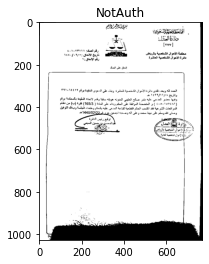

In [ ]:
# img = Image.open('/content/test.png') 
img = cv2.imread("/content/test/462.png",0)
x,img = cv2.threshold(img,0, 255,  cv2.THRESH_BINARY+cv2.THRESH_OTSU)
img = cv2.cvtColor(img,cv2.COLOR_GRAY2RGB)
resized = cv2.resize(img, (224,224)) 

data = convertData(resized)
plt.imshow(img)
ret = model.predict(data, batch_size=BS) 
bestnum = 0.0
bestclass = 0

if  ret[0] < 0.5:
    bestclass = 0
else :
    bestclass = 1



plt.title (_labels[bestclass])
                                                  
plt.show()

In [ ]:
ret

NameError: ignored

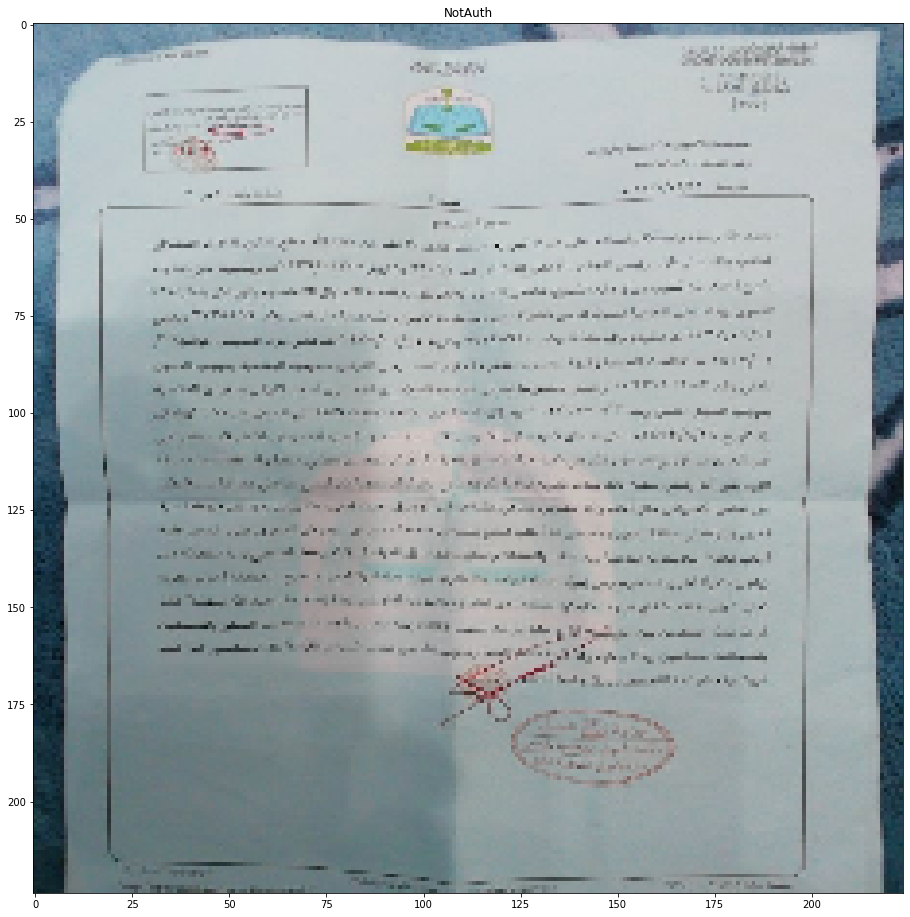

In [ ]:
# img = Image.open('/content/test.png') 
img = cv2.imread("/content/test/4987.png")
img = resized = cv2.resize(img, (224,224)) 

plt.figure(figsize=(16,16))
data = convertData(img)
plt.imshow(img)
ret = model.predict(data, batch_size=BS) 
bestnum = 0.0
bestclass = 0

if  ret[0] < 0.5:
    bestclass = 0
else :
    bestclass = 1



plt.title(_labels[bestclass])
                                                  
plt.show()

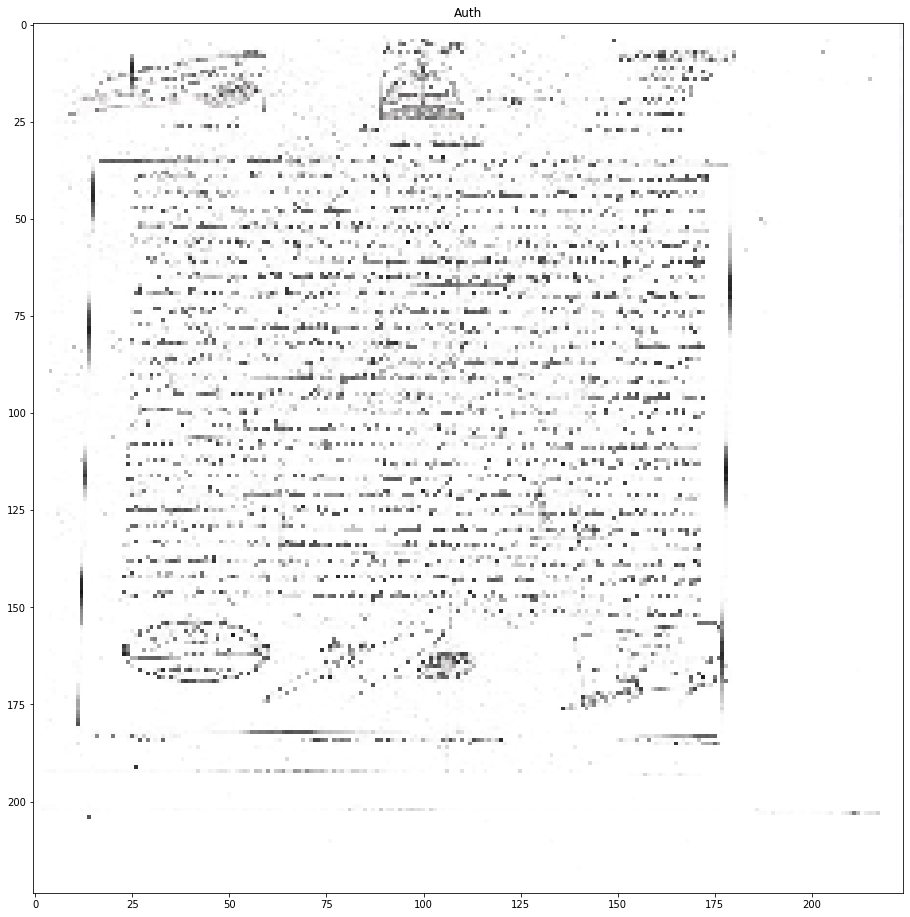

In [ ]:
# img = Image.open('/content/test.png') 
img = cv2.imread("/content/dataset/Auth/OUT_10thDoc0.png")
img = resized = cv2.resize(img, (224,224)) 

plt.figure(figsize=(16,16))
data = convertData(img)
plt.imshow(img)
ret = model.predict(data, batch_size=BS) 
bestnum = 0.0
bestclass = 0

if  ret[0] < 0.5:
    bestclass = 0
else :
    bestclass = 1



plt.title(_labels[bestclass])
                                                  
plt.show()

In [ ]:
#Relative Path 
img = Image.open("/content/test.png")  
  
#Angle given 
img = img.rotate(180)

In [ ]:
img.show()